In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt#data visualization library
from sklearn.feature_selection import SelectKBest #feature selection algorithm
from sklearn.feature_selection import chi2#Compute chi-squared stats between each non-negative feature and class.

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filePath = (os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [4]:
data = pd.read_csv(filePath)
print(data.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [5]:
X = data.iloc[:,3:31]  #independent columns
y = data['diagnosis']   #target column i.e diagnosis 


In [6]:
#apply SelectKBest class to extract top 10 best features
featuresList = []
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
features = featureScores.nlargest(10,'Score')
print(features)  #print 10 best features
for features in features['Specs']:
    featuresList.append(features)#to avoid hardcode later



              Specs          Score
22       area_worst  112598.431564
2         area_mean   53991.655924
12          area_se    8758.504705
21  perimeter_worst    3665.035416
1    perimeter_mean    2011.102864
19     radius_worst     491.689157
11     perimeter_se     250.571896
20    texture_worst     174.449400
0      texture_mean      93.897508
25  concavity_worst      39.516915


In [7]:
#Creating new data frame for the best features
data_drop = data[featuresList]

<Figure size 432x288 with 0 Axes>

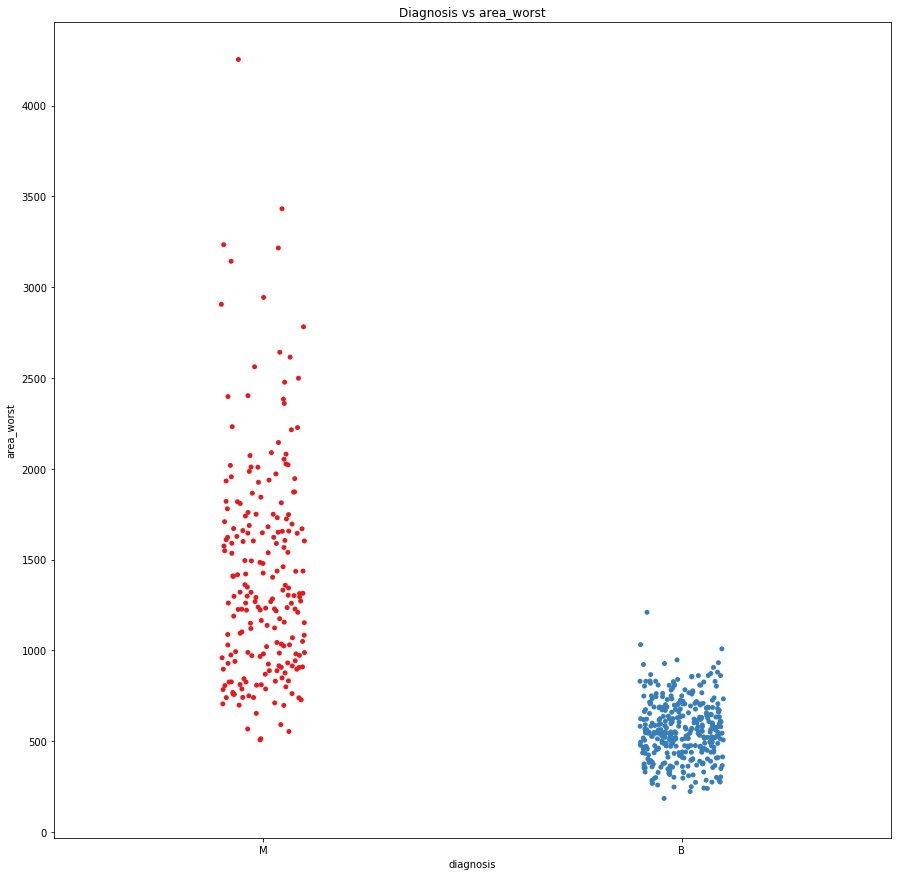

<Figure size 432x288 with 0 Axes>

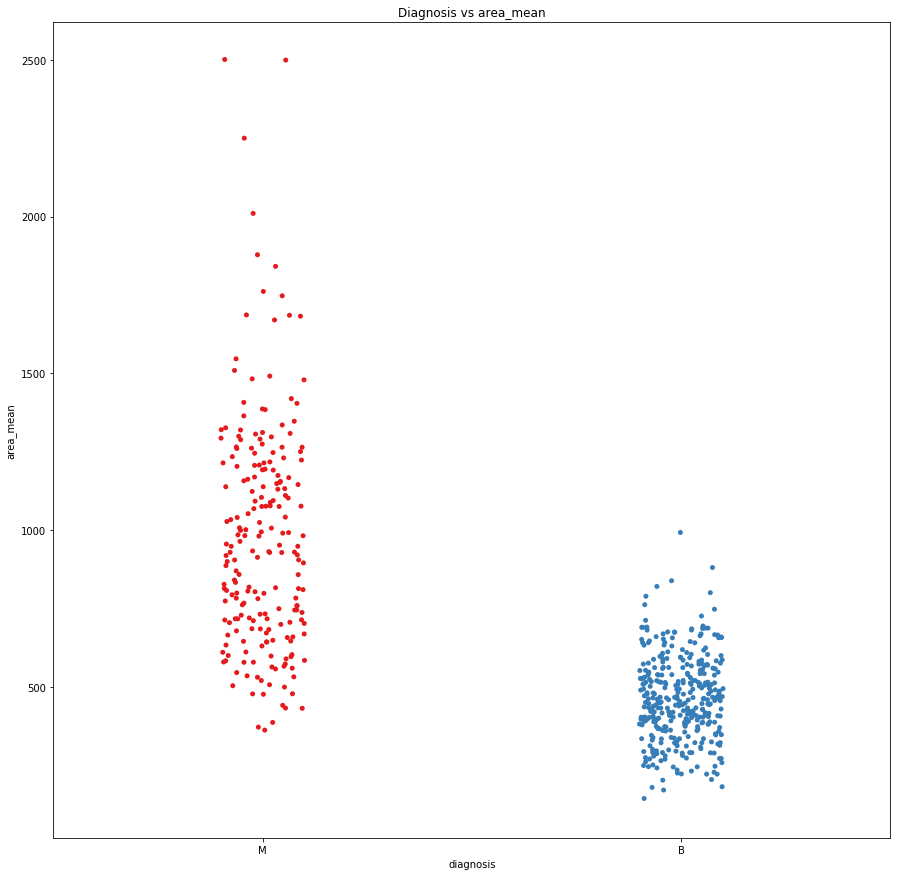

<Figure size 432x288 with 0 Axes>

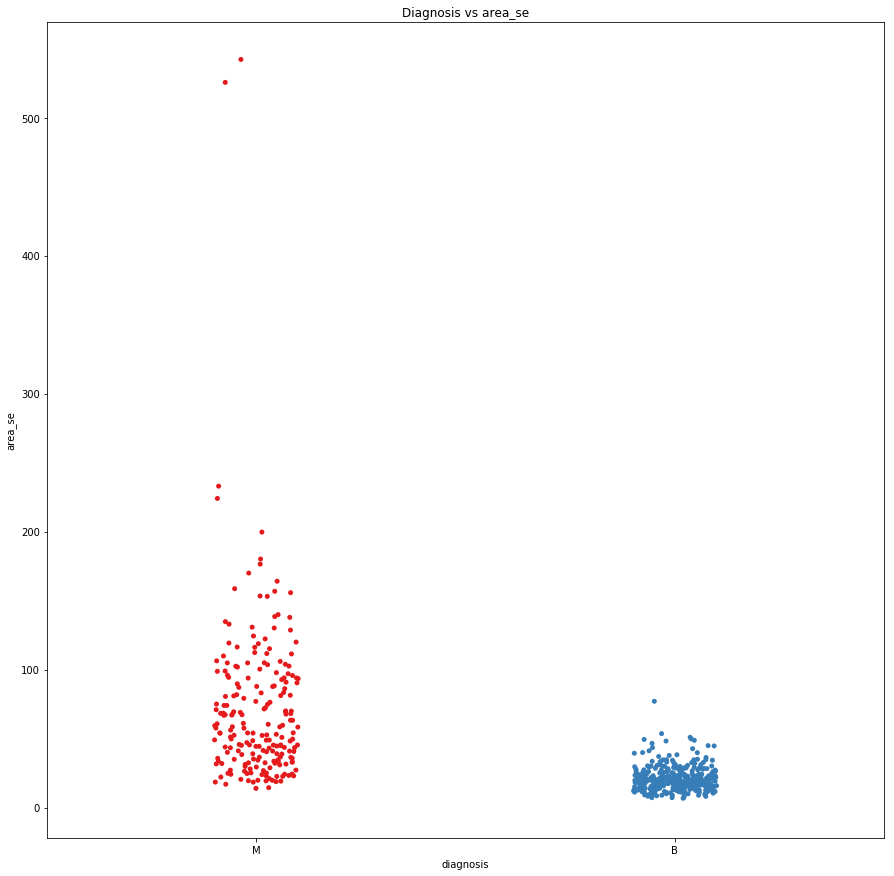

<Figure size 432x288 with 0 Axes>

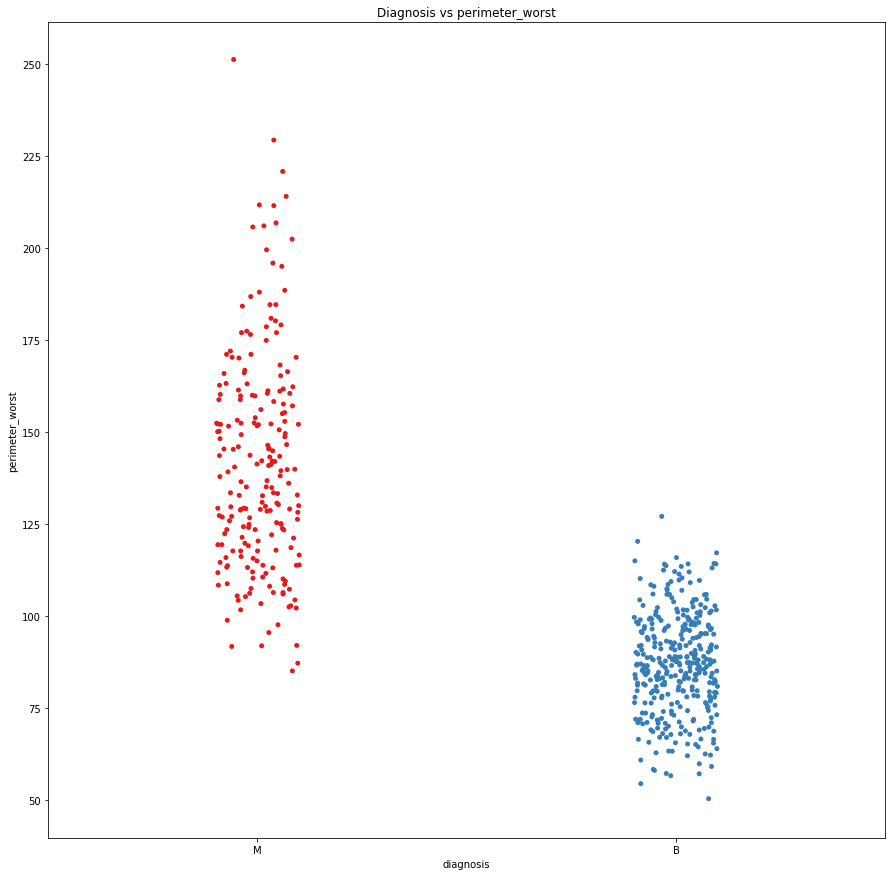

<Figure size 432x288 with 0 Axes>

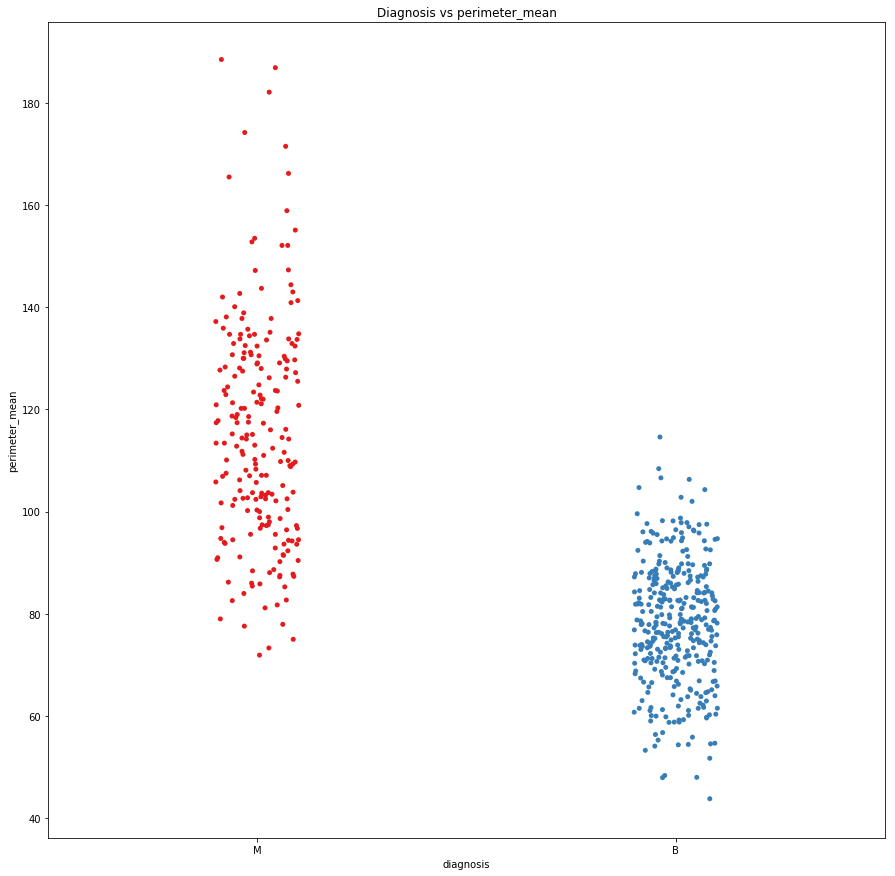

<Figure size 432x288 with 0 Axes>

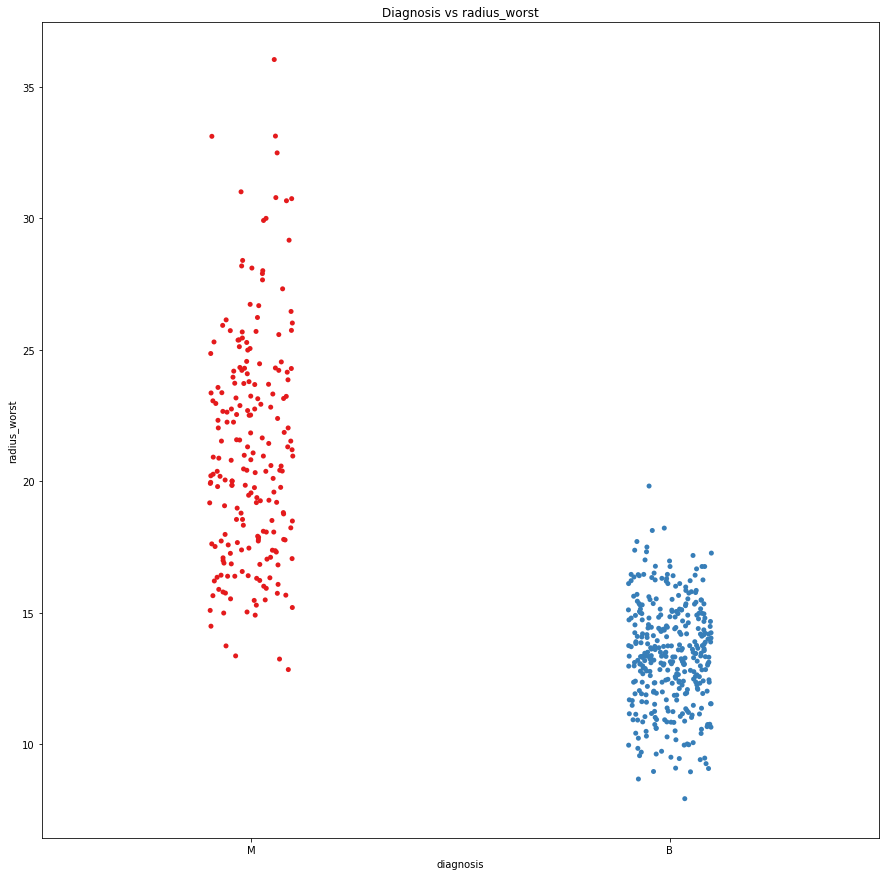

<Figure size 432x288 with 0 Axes>

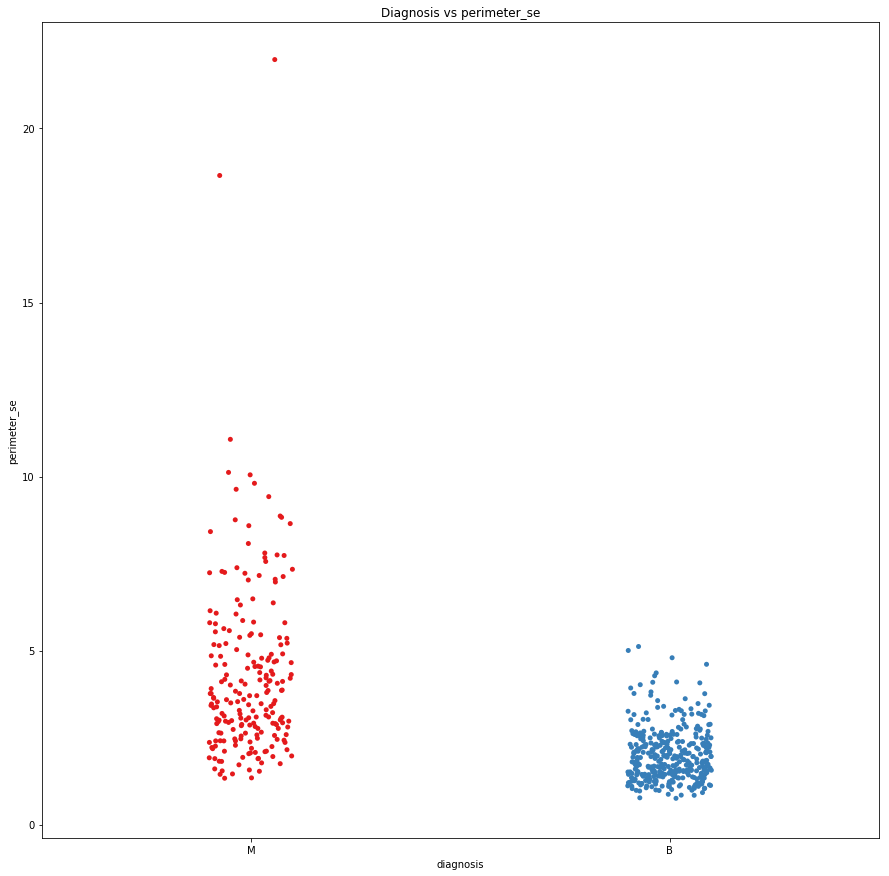

<Figure size 432x288 with 0 Axes>

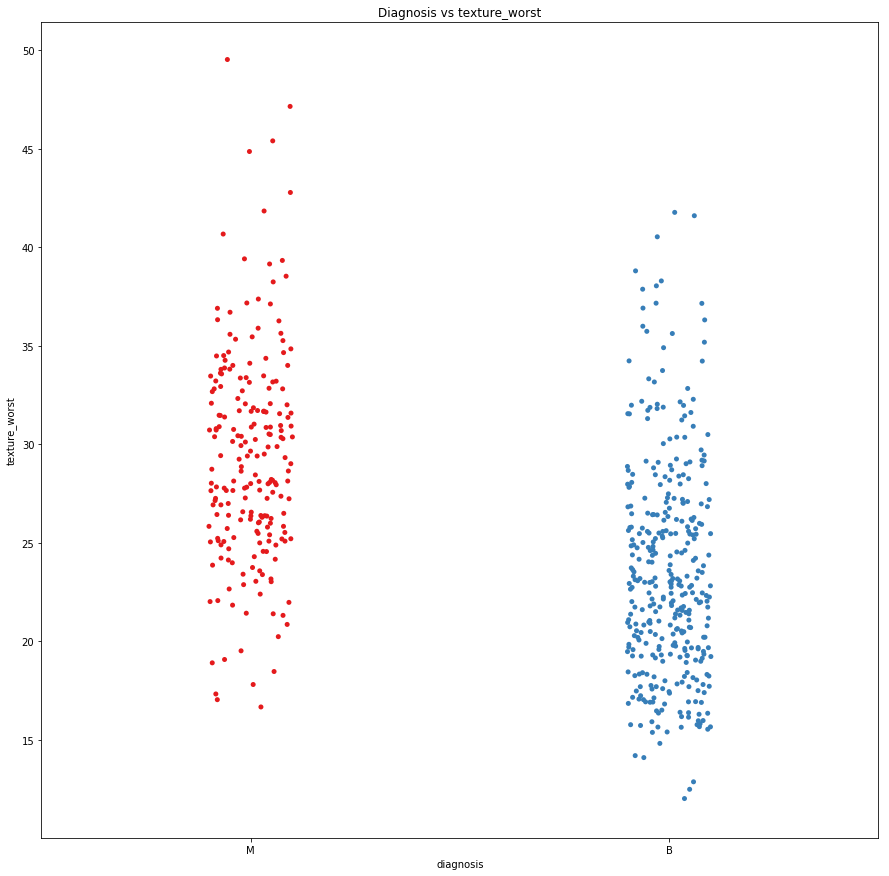

<Figure size 432x288 with 0 Axes>

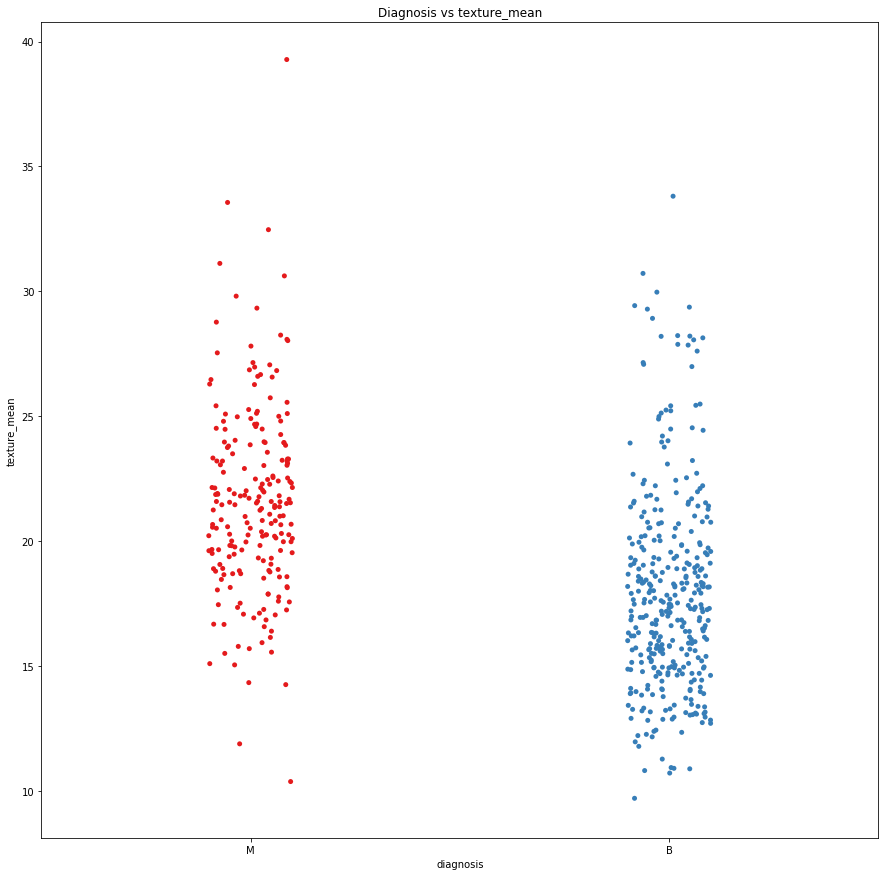

<Figure size 432x288 with 0 Axes>

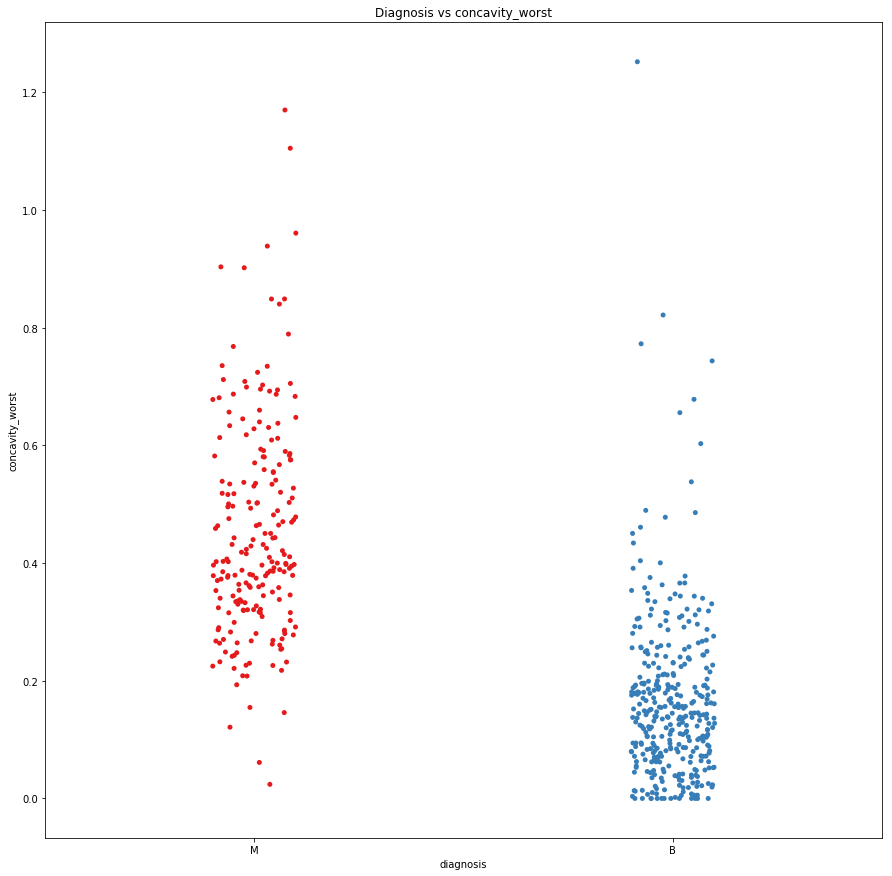

In [11]:
#plot these features against diagnosis to better understand the data and importance of features
for index,columns in enumerate(data_drop):
    plt.figure(index)
    plt.figure(figsize=(15,15))
    sns.stripplot(x='diagnosis', y= columns, data= data, jitter=True, palette = 'Set1').set_title('Diagnosis vs ' + str(columns))
    plt.show()

In [ ]:
for index,columns in enumerate(data_drop):
    plt.figure(index)
    plt.figure(figsize=(10,10))
    sns.stripplot(x='diagnosis', y= columns, data= data, jitter=True, palette = 'Set1')
    #sns.plt.title('Diagnosis vs ' + str(columns))
    plt.show()

In [ ]:
#Data and label
X = data_drop[:]
y = data['diagnosis']

In [ ]:
#implementing KNN
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
#scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#train and predict
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
#predict
y_pred = classifier.predict(X_test)

#evaluate the algorithm
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
